In [348]:
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
import math
import os

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['axes.linewidth'] = 1.0
os.chdir('/Users/ngdnh/Codespace/topo-qubit')

In [349]:
def hamiltonian(Ec, Ej, N, ng):
    '''
        Hamiltonian for a charge qubit
    '''
    m = np.diag(4 * Ec * (np.arange(-N, N+1) - ng) ** 2) + 0.5 * Ej * (
        np.diag(np.ones(2 * N), 1) + np.diag(np.ones(2 * N), -1)
    )
    return qt.Qobj(m)

# CPB qubit

In [350]:
ngs = np.linspace(-1, 1, 200)

eig = np.zeros((len(ngs), 6))

for k, ng in enumerate(ngs):
    H2p = hamiltonian(Ec=1, Ej=1, N=3, ng=ng)
    vals, _ = H2p.eigenstates()
    eig[k, :] = vals[:6]

eig = eig.T 

In [351]:
H2p

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dense, isherm=True
Qobj data =
[[64.   0.5  0.   0.   0.   0.   0. ]
 [ 0.5 36.   0.5  0.   0.   0.   0. ]
 [ 0.   0.5 16.   0.5  0.   0.   0. ]
 [ 0.   0.   0.5  4.   0.5  0.   0. ]
 [ 0.   0.   0.   0.5  0.   0.5  0. ]
 [ 0.   0.   0.   0.   0.5  4.   0.5]
 [ 0.   0.   0.   0.   0.   0.5 16. ]]

In [352]:
val01, _ = (hamiltonian(Ec=1, Ej=1, N=20, ng=0.5)).eigenstates()
E01 = val01[1]-val01[0]
E01

np.float64(0.9961124875822163)

In [353]:
ZPE = min(eig[0]/E01)

print(ZPE)

-0.12224066111908197


In [354]:
phis = np.linspace(-np.pi, np.pi, 1000)
potentials = np.array([-1*np.cos(p) for p in phis])

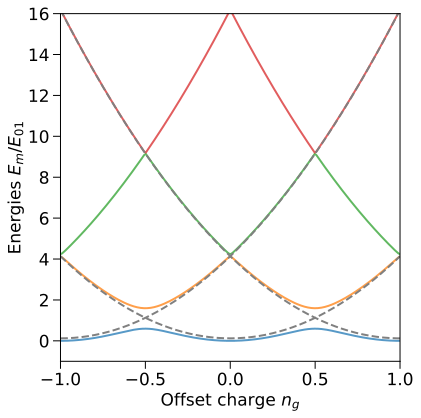

In [355]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))

for i in range(4):
    ax.plot(ngs, eig[i]/E01-ZPE, lw=2, alpha=0.75)

for ng0 in [-1, 0, 1]:
    ax.plot(ngs, [4*(ng-ng0)**2/E01-ZPE for ng in ngs], lw=2, color='gray', linestyle='dashed')

ax.set_xlim([-1,1])
ax.set_ylim([-1, 16])
ax.tick_params(axis='both', labelsize=17, direction='out', which='both', length=7.5, width=1.0)
ax.set_xlabel(r'Offset charge $n_g$',fontsize=17)
ax.set_ylabel(r'Energies $E_m/E_{01}$',fontsize=17)

fig.tight_layout()
# fig.savefig('./images/thesis/CPB_qubit_spectra.png', dpi=1000, transparent=True)

In [356]:
_, vecs = (hamiltonian(Ec=1, Ej=1, N=20, ng=0)).eigenstates()

vecs[0], vecs[1]

(Quantum object: dims=[[41], [1]], shape=(41, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 1.38234566e-55]
  [-4.42384276e-52]
  [ 1.27771338e-48]
  [-3.31214381e-45]
  [ 7.65848183e-42]
  [-1.56864326e-38]
  [ 2.82393911e-35]
  [-4.42862267e-32]
  [ 5.98857353e-29]
  [-6.90029068e-26]
  [ 6.68115583e-23]
  [-5.34654483e-20]
  [ 3.46585642e-17]
  [-1.77535718e-14]
  [ 6.96368905e-12]
  [-2.00722057e-09]
  [ 4.01925970e-07]
  [-5.15423985e-05]
  [ 3.72320294e-03]
  [-1.19997667e-01]
  [ 9.85481299e-01]
  [-1.19997667e-01]
  [ 3.72320294e-03]
  [-5.15423985e-05]
  [ 4.01925970e-07]
  [-2.00722057e-09]
  [ 6.96368905e-12]
  [-1.77535718e-14]
  [ 3.46585642e-17]
  [-5.34654483e-20]
  [ 6.68115583e-23]
  [-6.90029068e-26]
  [ 5.98857353e-29]
  [-4.42862267e-32]
  [ 2.82393911e-35]
  [-1.56864326e-38]
  [ 7.65848183e-42]
  [-3.31214381e-45]
  [ 1.27771338e-48]
  [-4.42384276e-52]
  [ 1.38234566e-55]],
 Quantum object: dims=[[41], [1]], shape=(41, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 

In [357]:
def compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts, range_N):
    return np.array([
        (1 / math.sqrt(2 * np.pi)) * np.sum(
            coef * np.exp(1j * phi_basis_labels[k] * range_N)
        ) for k in range(phi_grid_pts)
    ])

In [358]:
phi_wavefunc_amplitudes = [
    np.empty(len(phis), dtype=np.complex128) for _ in range(2)
]
coefficients = [np.real(vecs[0].full()[:, 0]), np.real(vecs[1].full()[:, 0])]

for i, coef in enumerate(coefficients):
    phi_wavefunc_amplitudes[i] = compute_wavefunction_amplitudes(coef, phis, len(phis), 22)

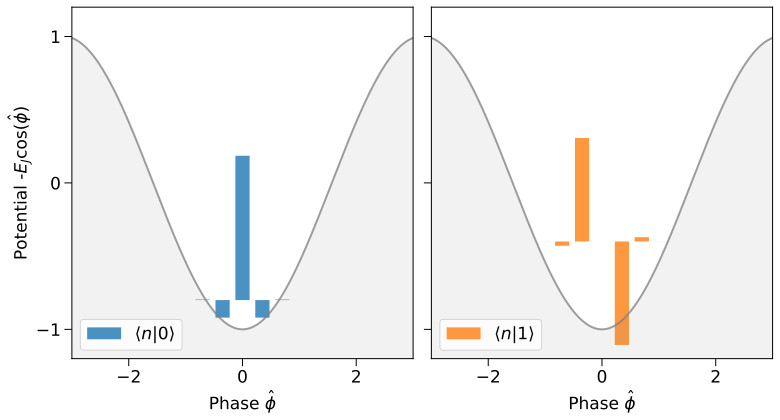

In [370]:
fig, axes = plt.subplots(ncols=2, figsize=(11, 6), sharey=True)

axes[0].bar(np.linspace(-7, 7, 41), np.real(vecs[0].full()[:, 0]), width=0.25, bottom=-0.8, label=r'$\langle n|0\rangle$', alpha=0.8)
axes[1].bar(np.linspace(-7, 7, 41), np.real(vecs[1].full()[:, 0]), width=0.25, bottom=-0.4, color='tab:orange', label=r'$\langle n|1\rangle$', alpha=0.8)
axes[0].set_ylabel(r'Potential -$E_J\cos(\hat\phi)$',fontsize=17)
axes[0].set_yticks([-1, 0, 1])

for ax in axes:
    ax.plot(phis, potentials, lw=2, color='gray', alpha=0.75)
    ax.fill_between(phis, potentials, -2, color='gray', alpha=0.1)
    ax.set_xlim([min(phis), max(phis)])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xlim([-3, 3])
    ax.tick_params(axis='both', labelsize=17, direction='out', which='both', length=7.5, width=1.0)
    ax.set_xlabel(r'Phase $\hat\phi$',fontsize=17)
    ax.set_xticks([-2, 0, 2])
    ax.legend(fontsize=17)

fig.tight_layout()
# fig.savefig('./images/thesis/CPB_qubit_spectra.png', dpi=1000, transparent=True)